### Sushanta Shrestha
### Project 7

## Part 1 - Linear Regression
# Section 1 - Load

In [27]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


# Section 2 - View
### To view the head and tail of the DataFrame, you can use the head() and tail() methods.

In [28]:
print(nyc.head())
print(nyc.tail())


     Date  Temperature  Anomaly
0  189501         34.2     -3.2
1  189601         34.7     -2.7
2  189701         35.5     -1.9
3  189801         39.6      2.2
4  189901         36.4     -1.0
       Date  Temperature  Anomaly
119  201401         35.5     -1.9
120  201501         36.1     -1.3
121  201601         40.8      3.4
122  201701         42.8      5.4
123  201801         38.7      1.3


# Section 4 - Describe


In [29]:
print(nyc.describe())


                Date  Temperature     Anomaly
count     124.000000   124.000000  124.000000
mean   195651.000000    37.595161    0.195161
std      3593.976442     4.539848    4.539848
min    189501.000000    26.100000  -11.300000
25%    192576.000000    34.575000   -2.825000
50%    195651.000000    37.600000    0.200000
75%    198726.000000    40.600000    3.200000
max    201801.000000    47.600000   10.200000


# Section 5 - Calculate Line

In [30]:
from scipy import stats

linear_regression = stats.linregress(x=nyc['Date'], y=nyc['Temperature'])


# Section 6 - Predict

In [36]:
temp_2026 = linear_regression.slope * 2026 + linear_regression.intercept
print(temp_2026)


8.994113296616847


# Section 7 - Plot

(10.0, 70.0)

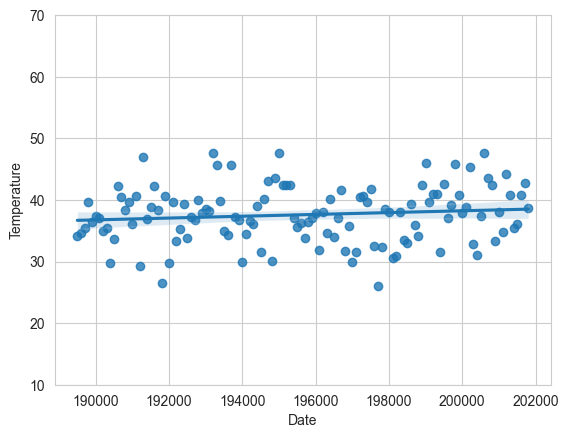

In [38]:
import seaborn as sns

# Set the style of the plot
sns.set_style('whitegrid')

# Create a scatter plot with a regression line
axes = sns.regplot(x=nyc['Date'], y=nyc['Temperature'])

# Set the y-axis limits
axes.set_ylim(10, 70)
